# Visualizing Gradient Descent

Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function." in a simple manner :"Gradient descent is an iterative technique commonly used in machine learning and deep learning to find the best possible set of parameters / coefficients for a given model, data points, and loss function, starting from an initial, and usually random, guess."

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from plot import *

For getting intuition let’s define a simple linear model : y = b + w x + epsilon
In this model, we use a feature (x) to try to predict the value of a label (y). There are three elements in our model: • parameter b, the bias (or intercept), which tells us the expected average value of y when x is zero • parameter w, the weight (or slope), which tells us how much y increases, on average, if we increase x by one unit • and that last term ,epsilon, which is there to account for the inherent noise;


### Data Generation: Synthetic Data

In order to generate synthetic data for our model, we need to pick values for its parameters. I chose b = 1 and w = 2.

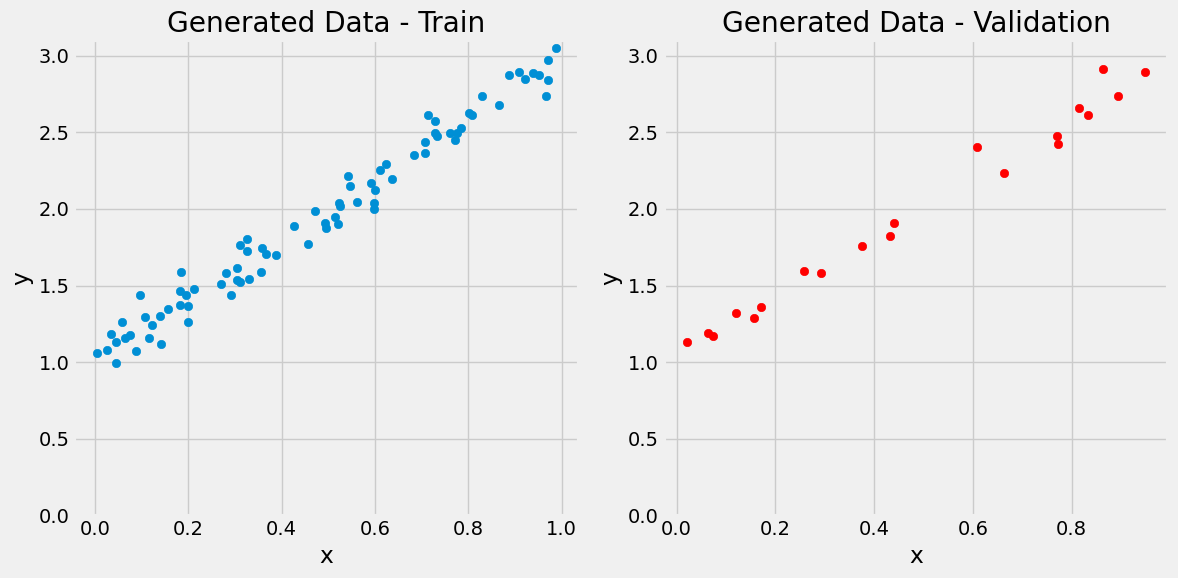

In [2]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))

#model: y = b + w x + epsilon
y = true_b + true_w * x + epsilon

# split data to train_test and Shuffle
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2,shuffle=True, random_state=42)

figure1(x_train, y_train, x_val, y_val)

## Random Initialization

 We need to randomly initialize the parameters / weights (we have only two, b and w).


[0.49671415] [-0.1382643]


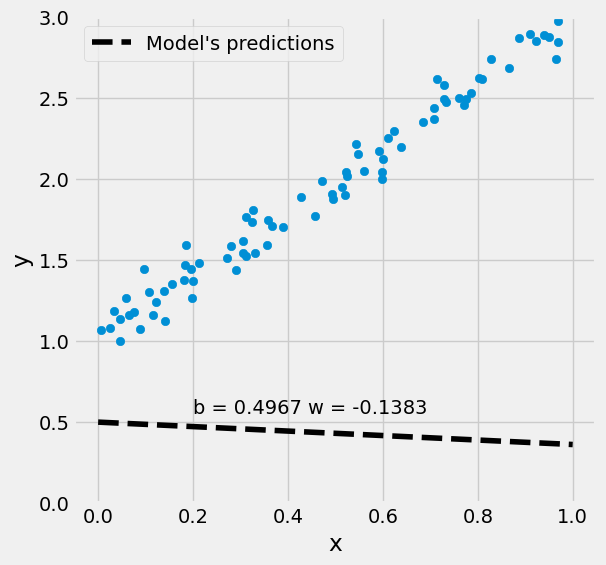

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

In [3]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train

# Generates evenly spaced x feature
x_range = np.linspace(0, 1, 101)
# Computes yhat
yhat_range = b + w * x_range

figure2(x_train, y_train, b, w)

## Compute the Loss

We simply computes the model’s predictions using the current values of the parameters / weights. At the very beginning, we will be producing really bad predictions, as we started with random values.

2.630978705267677


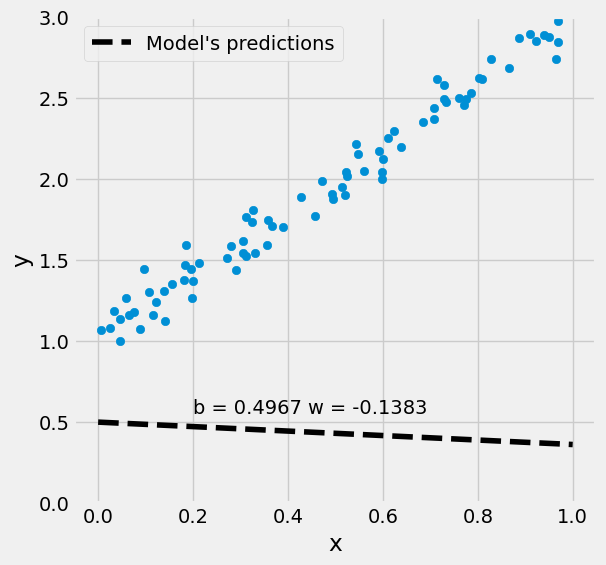

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

In [4]:
# We are using ALL data points, so this is BATCH gradient
error = (yhat - y_train)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()
print(loss)


figure3(x_train, y_train, b, w)

### Loss Surface

In [5]:
# we have to split the ranges in 100 evenly spaced intervals each
b_range = np.linspace(true_b - 3, true_b + 3, 101)
w_range = np.linspace(true_w - 3, true_w + 3, 101)
# meshgrid is a handy function that generates a grid of b and w
# values for all combinations
bs, ws = np.meshgrid(b_range, w_range)
# bs.shape, ws.shape

sample_x = x_train[0]
sample_yhat = bs + ws * sample_x
# sample_yhat.shape

all_predictions = np.apply_along_axis(
    func1d=lambda x: bs + ws * x, 
    axis=1, 
    arr=x_train
)
all_predictions.shape


all_labels = y_train.reshape(-1, 1, 1)
# all_labels.shape

all_errors = (all_predictions - all_labels)
# all_errors.shape

all_losses = (all_errors ** 2).mean(axis=0)
# all_losses.shape

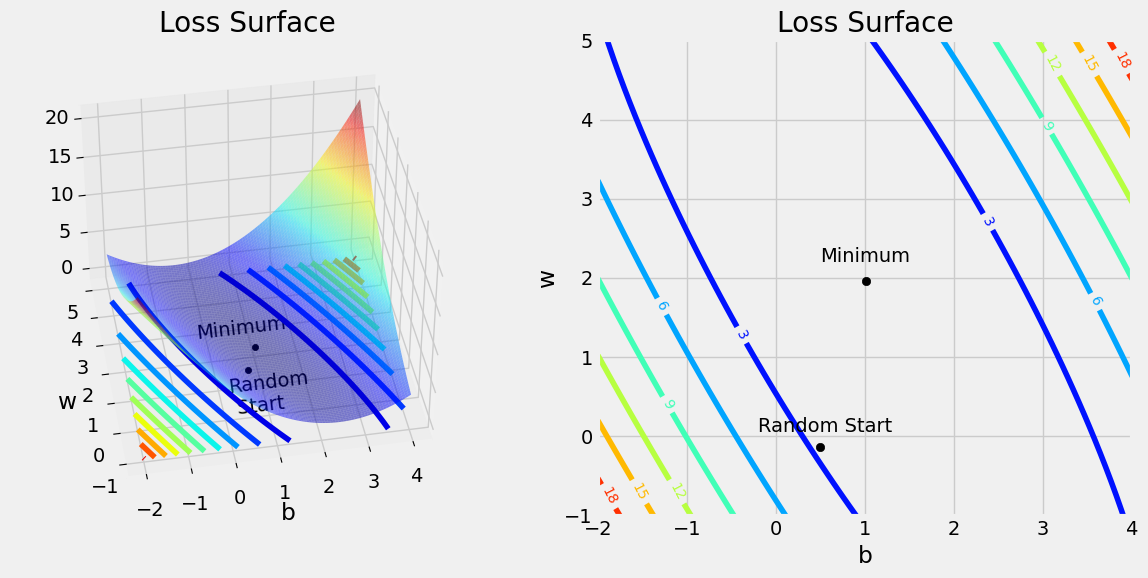

In [6]:
regression = LinearRegression()
regression.fit(x_train, y_train)
b_minimum, w_minimum = regression.intercept_[0], regression.coef_[0][0]


figure = plt.figure(figsize=(12, 6))

# 1st plot
ax1 = figure.add_subplot(1, 2, 1, projection='3d')
ax1.set_xlabel('b')
ax1.set_ylabel('w')
ax1.set_title('Loss Surface')

surf = ax1.plot_surface(bs, ws, all_losses, rstride=1, cstride=1, alpha=.5, cmap=plt.cm.jet, linewidth=0, antialiased=True)
ax1.contour(bs[0, :], ws[:, 0], all_losses, 10, offset=-1, cmap=plt.cm.jet)


bidx, widx, _, _ = find_index(b_minimum, w_minimum, bs, ws)
ax1.scatter(b_minimum, w_minimum, all_losses[bidx, widx], c='k')
ax1.text(-.3, 2.5, all_losses[bidx, widx], 'Minimum', zdir=(1, 0, 0))
# Random start
bidx, widx, _, _ = find_index(b, w, bs, ws)
ax1.scatter(b, w, all_losses[bidx, widx], c='k')
# Annotations
ax1.text(-.2, -1.5, all_losses[bidx, widx], 'Random\n Start', zdir=(1, 0, 0))

ax1.view_init(40, 260)

# 2nd plot
ax2 = figure.add_subplot(1, 2, 2)
ax2.set_xlabel('b')
ax2.set_ylabel('w')
ax2.set_title('Loss Surface')

# Loss surface
CS = ax2.contour(bs[0, :], ws[:, 0], all_losses, cmap=plt.cm.jet)
ax2.clabel(CS, inline=1, fontsize=10)
# Minimum
ax2.scatter(b_minimum, w_minimum, c='k')
# Random start
ax2.scatter(b, w, c='k')
# Annotations
ax2.annotate('Random Start', xy=(-.2, 0.05), c='k')
ax2.annotate('Minimum', xy=(.5, 2.2), c='k')   

figure.tight_layout()

In the center of the plot, where parameters (b, w) have values close to (1, 2), the loss
is at its minimum value. This is the point we’re trying to reach using gradient descent.
In the bottom, slightly to the left, there is the random start point, corresponding to
our randomly initialized parameters.

### Cross Sections

we can cut a cross-section in the loss surface to check
what the loss would look like if the other parameter were held constant

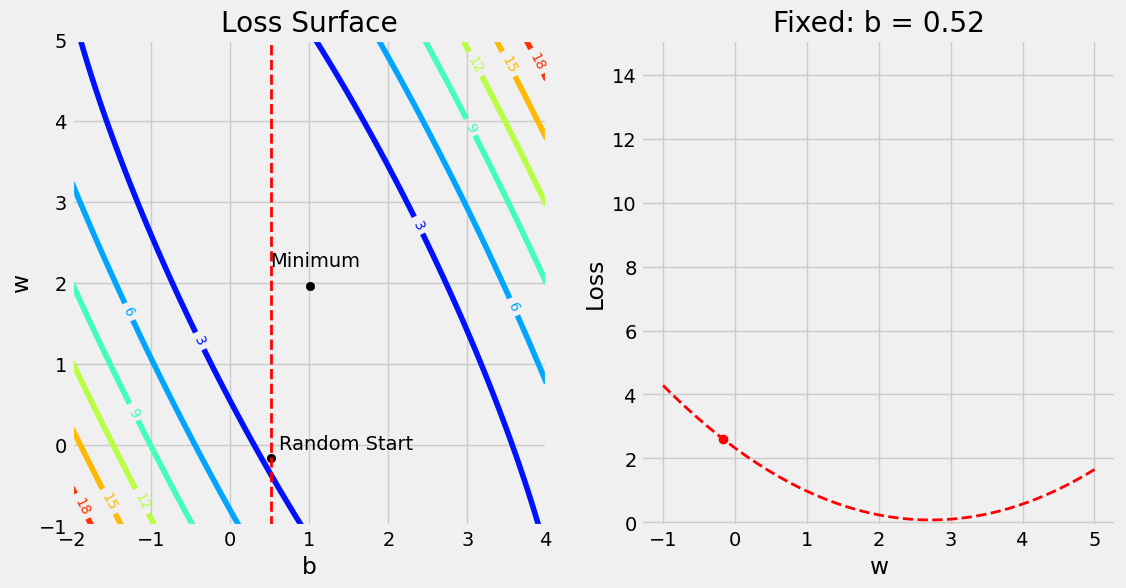

In [7]:
figure5(x_train, y_train, b, w, bs, ws, all_losses)

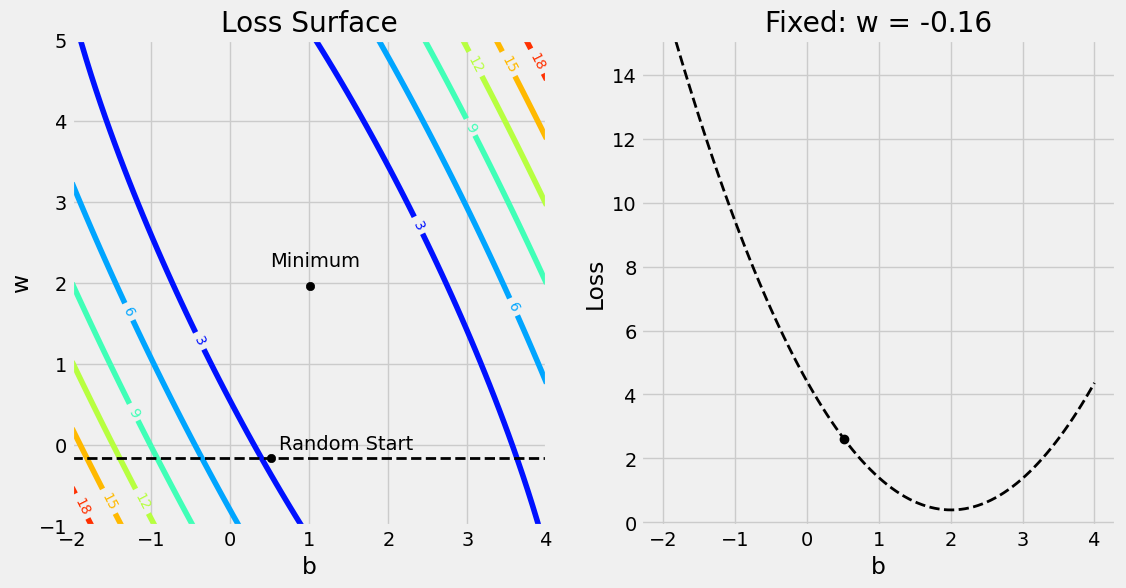

In [8]:
figure6(x_train, y_train, b, w, bs, ws, all_losses)

## Compute the Gradients

In [9]:
# Step 3 - Computes gradients for both "b" and "w" parameters
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

-2.999416722723086 -1.7599366531411136


### Visualizing the Gradients

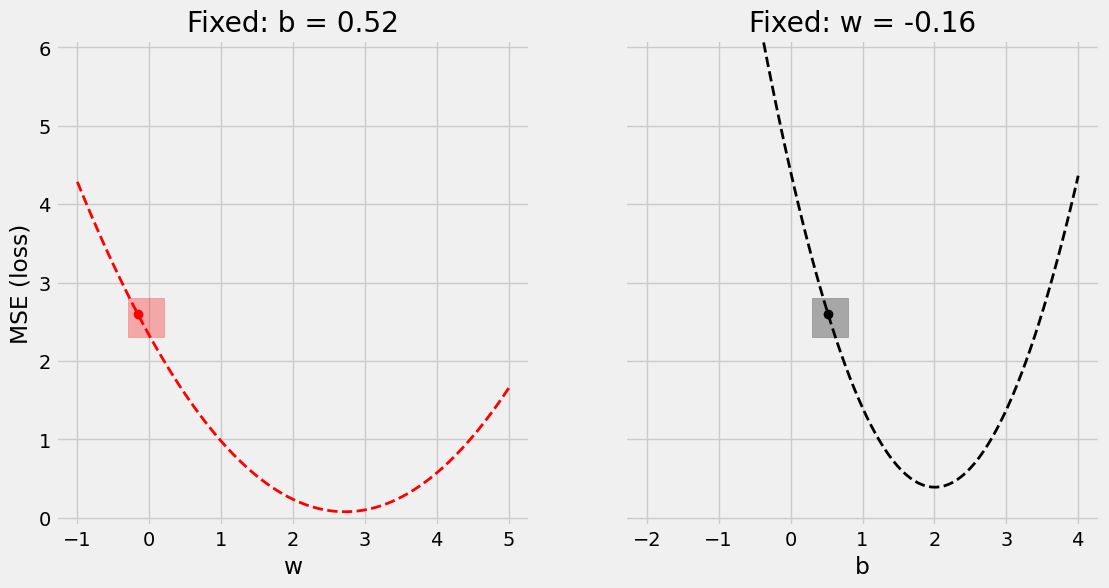

In [10]:
figure7(b, w, bs, ws, all_losses)

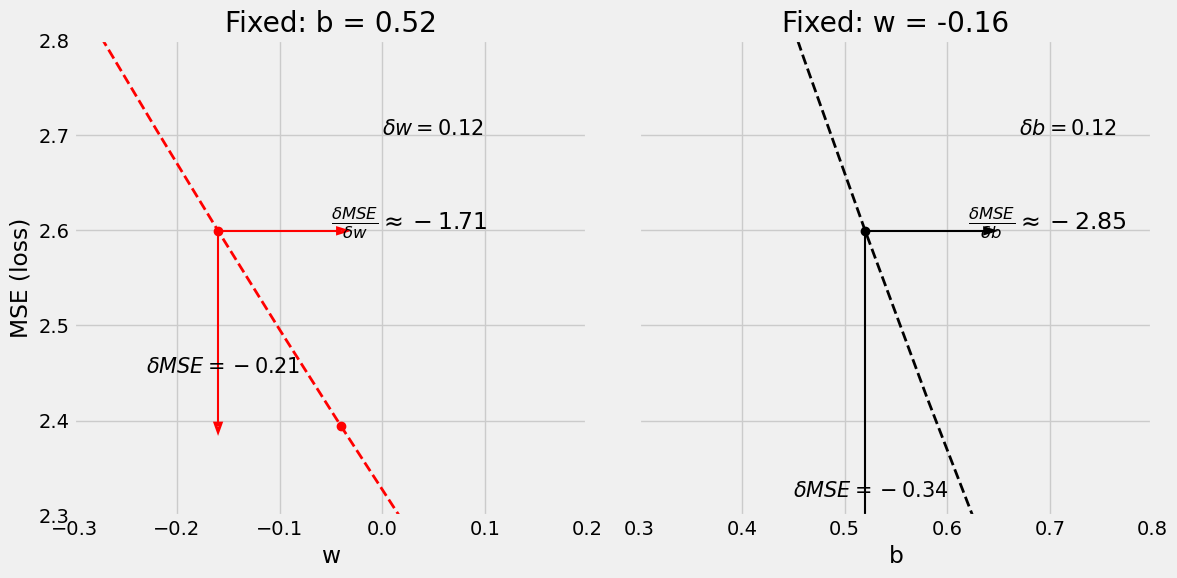

In [11]:
figure8(b, w, bs, ws, all_losses)

### Backpropagation

The backpropagation algorithm works by computing the gradient of the loss
function with respect to each weight by the chain rule, computing the
gradient one layer at a time, iterating backward from the last layer to avoid
redundant calculations of intermediate terms in the chain rule;
The term backpropagation strictly refers only to the algorithm for computing
the gradient, not how the gradient is used; but the term is often used loosely
to refer to the entire learning algorithm, including how the gradient is used,
such as by stochastic gradient descent.

## Update the Parameters

we use the gradients to update the parameters. Since we are
trying to minimize our losses, we reverse the sign of the gradient for the update.
There is still another (hyper-)parameter to consider: the learning rate, denoted by
the Greek letter eta (that looks like the letter n), which is the multiplicative factor
that we need to apply to the gradient for the parameter update.

In [12]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1
print(b, w)

# Step 4 - Updates parameters using gradients and the 
# learning rate
b = b - lr * b_grad
w = w - lr * w_grad

print(b, w)

[0.49671415] [-0.1382643]
[0.79665583] [0.03772936]


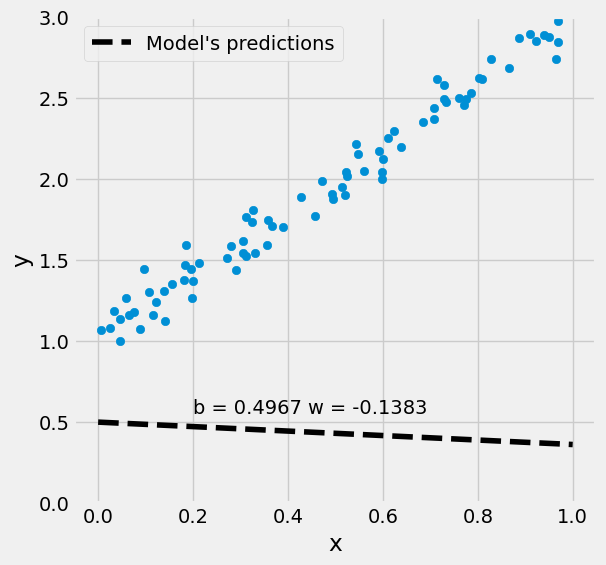

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

In [13]:
figure9(x_train, y_train, b, w)

### Learning Rate

The learning rate is the most important hyper-parameter. There is a gigantic
amount of material on how to choose a learning rate, how to modify the learning
rate during the training, and how the wrong learning rate can completely ruin the
model training.


In [14]:
manual_grad_b = -2.90
manual_grad_w = -1.79

np.random.seed(42)
b_initial = np.random.randn(1)
w_initial = np.random.randn(1)

#### Low Learning Rate

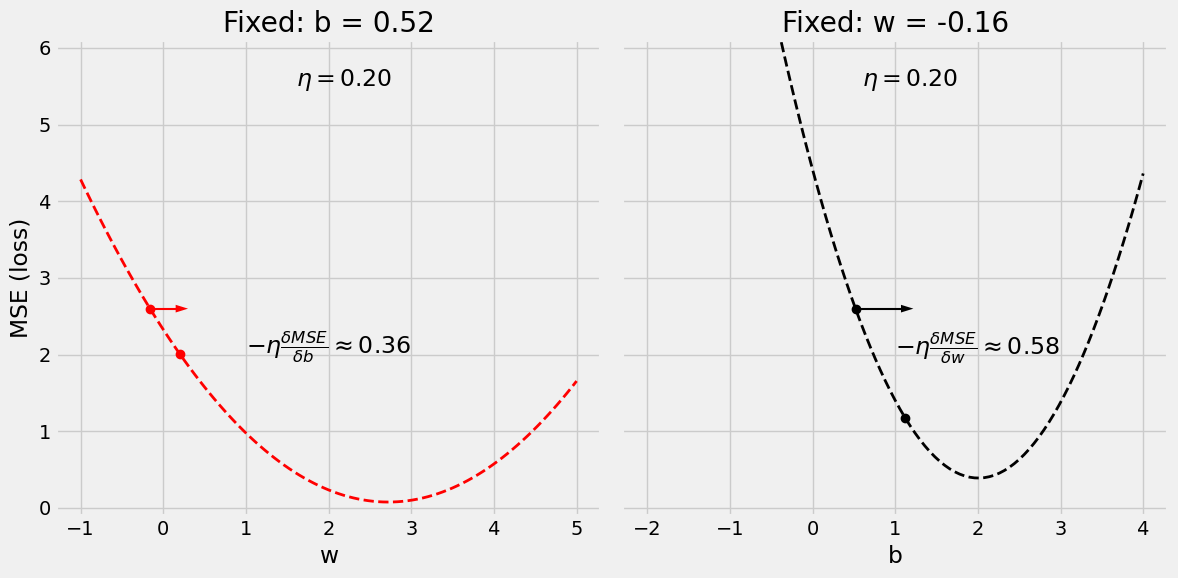

In [15]:
# Learning rate - greek letter "eta" that looks like an "n"
lr = .2

figure10(b_initial, w_initial, bs, ws, all_losses, manual_grad_b, manual_grad_w, lr)

#### High Learning Rate

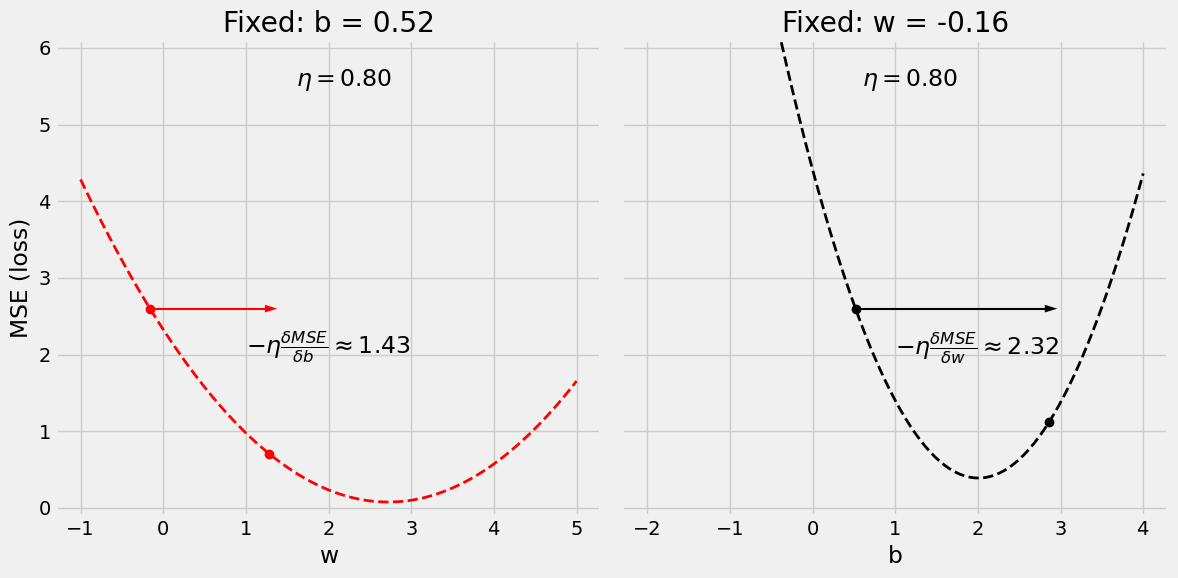

In [16]:
# Learning rate - greek letter "eta" that looks like an "n"
lr = .8

figure10(b_initial, w_initial, bs, ws, all_losses, manual_grad_b, manual_grad_w, lr)

#### Very High Learning Rate

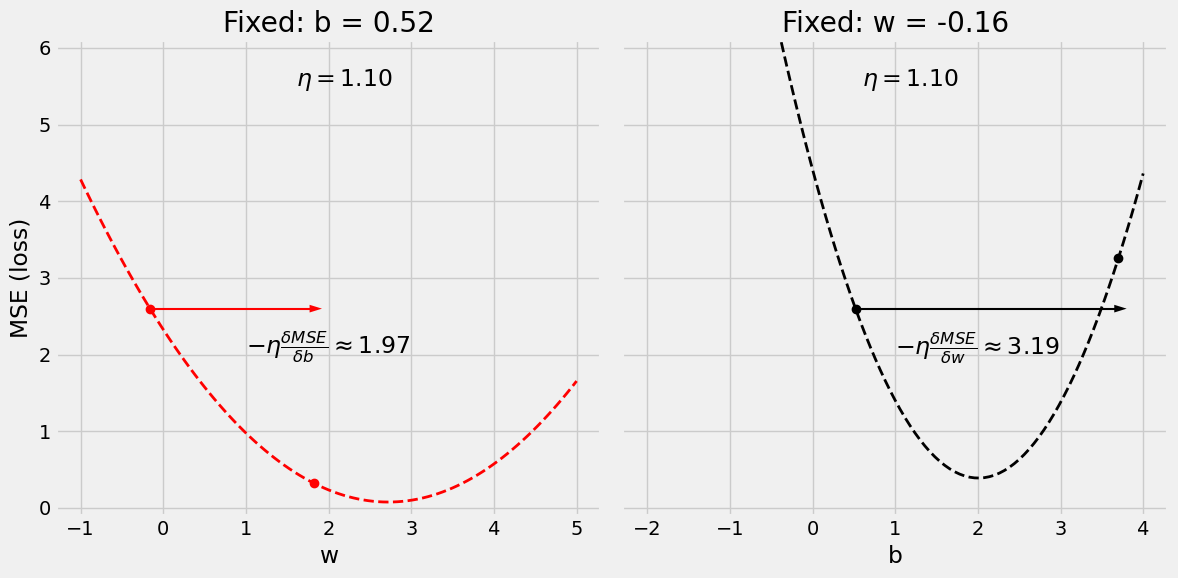

In [17]:
# Learning rate - greek letter "eta" that looks like an "n"
lr = 1.1

figure10(b_initial, w_initial, bs, ws, all_losses, manual_grad_b, manual_grad_w, lr)

#### Scaling / Standardizing / Normalizing

This is one of the most
important pre-processing steps, not only for the sake of improving the
performance of gradient descent, but for other techniques such as principal
component analysis (PCA) as well. The goal is to have all numerical features
in a similar scale, so the results are not affected by the original range of each
feature.